# MEWpy Simulation 

Author: Vitor Pereira

License: [CC BY-SA 4.0](http://creativecommons.org/licenses/by-sa/4.0/)

-------
This notebook exemplifies how MEWpy may be used for phenotype simulation.

Models can be loaded using MEW, REFRAMED, or COBRApy. 

Load a model using REFRAMED: 

In [ ]:
! pip install -U -q mewpy

In [1]:
import mewpy
mewpy.info()

MEWpy version: 0.1.30
Author: BiSBII CEB University of Minho
Contact: vpereira@ceb.uminho.pt 

Available LP solvers: cplex glpk
Default LP solver: cplex 
Available ODE solvers: scipy
Default ODE solver: scipy 
Optimization Problems: AbstractKOProblem AbstractOUProblem CofactorSwapProblem CommunityKOProblem ETFLGKOProblem ETFLGOUProblem GKOProblem GOUProblem GeckoKOProblem GeckoOUProblem KcatOptProblem KineticKOProblem KineticOUProblem MediumProblem OptORFProblem OptRamProblem RKOProblem ROUProblem 

Available EA engines: inspyred jmetal
Default EA engine: jmetal
Available EAs: GA NSGAII NSGAIII SA SPEA2 


IMPORTANT: The notebooks require a MEWpy version >= 0.1.16

In [2]:
from reframed.io.sbml import load_cbmodel
model = load_cbmodel('data/e_coli_core.xml.gz')

or using COBRApy:

In [3]:
from cobra.io import read_sbml_model
model = read_sbml_model('data/e_coli_core.xml.gz')

A simulator object provides a common interface to realize the main phenotype analysis tasks. The *get_simulator* function returns a simulator, a wrapper,  for the provided model. The simulator interface remains the same regardless of how the model was loaded, using REFRAMED or COBRApy. This simplify the use of both environments and ease the management of future changes and deprecation on their APIs.


In [4]:
from mewpy.simulation import get_simulator
simul = get_simulator(model)

The simulator offers a wide API, and enable to perform basic tasks, such as, list  metabolites, reactions, genes, compartments, uptake reactions, and transport reactions:

In [5]:
# first 10 metabolites
simul.metabolites[:10]

['glc__D_e',
 'gln__L_c',
 'gln__L_e',
 'glu__L_c',
 'glu__L_e',
 'glx_c',
 'h2o_c',
 'h2o_e',
 'h_c',
 'h_e']

In [6]:
# first 10 metabolites
simul.reactions[:10]

['ACALD',
 'ACALDt',
 'ACKr',
 'ACONTa',
 'ACONTb',
 'ACt2r',
 'ADK1',
 'AKGDH',
 'AKGt2r',
 'ALCD2x']

In [7]:
# first 10 genes
simul.genes[:10]

['b1241',
 'b0351',
 's0001',
 'b2296',
 'b1849',
 'b3115',
 'b0118',
 'b1276',
 'b0474',
 'b0726']

In [8]:
simul.compartments

{'e': 'extracellular space', 'c': 'cytosol'}

For a more compreensive look at the list of reactions, you may use the `find` function, without any parameters (list all reactions), or by adding a _filter_:

In [9]:
simul.find()

,name,lb,ub,stoichiometry,gpr,annotations
id,,,,,,
ACALD,Acetaldehyde dehydrogenase (acetylating),-1000.0,1000.0,"{'acald_c': -1.0, 'coa_c': -1.0, 'nad_c': -1.0...",b0351 or b1241,"{'sbo': 'SBO:0000375', 'bigg.reaction': 'ACALD..."
ACALDt,Acetaldehyde reversible transport,-1000.0,1000.0,"{'acald_e': -1.0, 'acald_c': 1.0}",s0001,"{'sbo': 'SBO:0000375', 'bigg.reaction': 'ACALD..."
ACKr,Acetate kinase,-1000.0,1000.0,"{'ac_c': -1.0, 'atp_c': -1.0, 'actp_c': 1.0, '...",b2296 or b3115 or b1849,"{'sbo': 'SBO:0000375', 'bigg.reaction': 'ACKr'..."
ACONTa,"Aconitase (half-reaction A, Citrate hydro-lyase)",-1000.0,1000.0,"{'cit_c': -1.0, 'acon_C_c': 1.0, 'h2o_c': 1.0}",b0118 or b1276,"{'sbo': 'SBO:0000375', 'bigg.reaction': 'ACONT..."
ACONTb,"Aconitase (half-reaction B, Isocitrate hydro-l...",-1000.0,1000.0,"{'acon_C_c': -1.0, 'h2o_c': -1.0, 'icit_c': 1.0}",b0118 or b1276,"{'sbo': 'SBO:0000375', 'bigg.reaction': 'ACONT..."
...,...,...,...,...,...,...
TALA,Transaldolase,-1000.0,1000.0,"{'g3p_c': -1.0, 's7p_c': -1.0, 'e4p_c': 1.0, '...",b2464 or b0008,"{'sbo': 'SBO:0000375', 'bigg.reaction': 'TALA'..."
THD2,NAD(P) transhydrogenase,0.0,1000.0,"{'h_e': -2.0, 'nadh_c': -1.0, 'nadp_c': -1.0, ...",b1602 and b1603,"{'sbo': 'SBO:0000375', 'bigg.reaction': 'THD2'..."
TKT1,Transketolase,-1000.0,1000.0,"{'r5p_c': -1.0, 'xu5p__D_c': -1.0, 'g3p_c': 1....",b2935 or b2465,"{'sbo': 'SBO:0000375', 'bigg.reaction': 'TKT1'..."


In [10]:
simul.find(['EX_','BIO'])

,name,lb,ub,stoichiometry,gpr,annotations
id,,,,,,
BIOMASS_Ecoli_core_w_GAM,Biomass Objective Function with GAM,0.0,1000.0,"{'3pg_c': -1.496, 'accoa_c': -3.7478, 'atp_c':...",,"{'sbo': ['SBO:0000629'], 'bigg.reaction': ['BI..."
EX_ac_e,Acetate exchange,0.0,1000.0,{'ac_e': -1.0},,"{'sbo': 'SBO:0000627', 'bigg.reaction': ['EX_a..."
EX_acald_e,Acetaldehyde exchange,0.0,1000.0,{'acald_e': -1.0},,"{'sbo': 'SBO:0000627', 'bigg.reaction': ['EX_a..."
EX_akg_e,2-Oxoglutarate exchange,0.0,1000.0,{'akg_e': -1.0},,"{'sbo': 'SBO:0000627', 'bigg.reaction': ['EX_a..."
EX_co2_e,CO2 exchange,-1000.0,1000.0,{'co2_e': -1.0},,"{'sbo': 'SBO:0000627', 'bigg.reaction': ['EX_c..."
EX_etoh_e,Ethanol exchange,0.0,1000.0,{'etoh_e': -1.0},,"{'sbo': 'SBO:0000627', 'bigg.reaction': ['EX_e..."
EX_for_e,Formate exchange,0.0,1000.0,{'for_e': -1.0},,"{'sbo': 'SBO:0000627', 'bigg.reaction': ['EX_f..."
EX_fru_e,D-Fructose exchange,0.0,1000.0,{'fru_e': -1.0},,"{'sbo': 'SBO:0000627', 'bigg.reaction': ['EX_f..."
EX_fum_e,Fumarate exchange,0.0,1000.0,{'fum_e': -1.0},,"{'sbo': 'SBO:0000627', 'bigg.reaction': ['EX_f..."


In [11]:
# metabolites
simul.find_metabolites()

,name,compartment,formula
id,,,
glc__D_e,D-Glucose,e,C6H12O6
gln__L_c,L-Glutamine,c,C5H10N2O3
gln__L_e,L-Glutamine,e,C5H10N2O3
glu__L_c,L-Glutamate,c,C5H8NO4
glu__L_e,L-Glutamate,e,C5H8NO4
...,...,...,...
fru_e,D-Fructose,e,C6H12O6
fum_c,Fumarate,c,C4H2O4
fum_e,Fumarate,e,C4H2O4


In [12]:
# metabolites
simul.find_genes()

,name,reactions
id,,
b1241,,"[ACALD, ALCD2x]"
b0351,,[ACALD]
s0001,,"[ACALDt, CO2t, H2Ot, NH4t, O2t]"
b2296,,[ACKr]
b1849,,[ACKr]
...,...,...
b2464,,[TALA]
b0008,,[TALA]
b2935,,"[TKT1, TKT2]"


Listing the uptake reactions:

In [13]:
simul.get_uptake_reactions()

['EX_co2_e',
 'EX_glc__D_e',
 'EX_h_e',
 'EX_h2o_e',
 'EX_nh4_e',
 'EX_o2_e',
 'EX_pi_e']

In [14]:
# for a more compreensive listage
simul.find(simul.get_uptake_reactions())

,name,lb,ub,stoichiometry,gpr,annotations
id,,,,,,
EX_co2_e,CO2 exchange,-1000.0,1000.0,{'co2_e': -1.0},,"{'sbo': 'SBO:0000627', 'bigg.reaction': ['EX_c..."
EX_glc__D_e,D-Glucose exchange,-10.0,1000.0,{'glc__D_e': -1.0},,"{'sbo': 'SBO:0000627', 'bigg.reaction': ['EX_g..."
EX_h_e,H+ exchange,-1000.0,1000.0,{'h_e': -1.0},,"{'sbo': 'SBO:0000627', 'bigg.reaction': ['EX_h..."
EX_h2o_e,H2O exchange,-1000.0,1000.0,{'h2o_e': -1.0},,"{'sbo': 'SBO:0000627', 'bigg.reaction': ['EX_h..."
EX_nh4_e,Ammonia exchange,-1000.0,1000.0,{'nh4_e': -1.0},,"{'sbo': 'SBO:0000627', 'bigg.reaction': ['EX_n..."
EX_o2_e,O2 exchange,-1000.0,1000.0,{'o2_e': -1.0},,"{'sbo': 'SBO:0000627', 'bigg.reaction': ['EX_o..."
EX_pi_e,Phosphate exchange,-1000.0,1000.0,{'pi_e': -1.0},,"{'sbo': 'SBO:0000627', 'bigg.reaction': ['EX_p..."


A simulator may also be loaded considering environmental conditions, that will be considered during phenotype simulations. In the next example, glucose consumption is limited to 10 mmol/gDW/h in anaerobical conditions.

In [15]:
envcond = {'EX_glc__D_e': (-10.0, 100000.0),
           'EX_o2_e':(0,0)}

simul = get_simulator(model,envcond=envcond)

All phenotype simulations will consider the imposed environmental conditions, and as such they only need to be set once. Also, these conditions do not persistently alter the model, which can be reused with a different simulator instance.

## Phenotype simulation

Phenotype simulations are also run using the simulator instance using  the `simulate` method. 

In [16]:
# FBA 
result = simul.simulate()
# or 
result = simul.simulate(method='FBA')

result

objective: 0.21166294973531058
Status: OPTIMAL
Method:FBA

Flux Balance Analysis (FBA) can be run without identifying any method, or  by passing the 'FBA' as method parameter. Other phenotype simulation methods may also be run using one of the identifiers:

- Flux Balance Analysis: `method = 'FBA'`
- Parsimonious FBA:`method = 'pFBA'`
- Minimization of Metabolic Adjustment:`method = 'MOMA'`
- Linear MOMA: `method = 'lMOMA'`
- Regulatory on/off minimization of metabolic flux: `method = 'ROOM'`

In [17]:
# pFBA
result = simul.simulate(method = 'pFBA')
result

objective: 335.65061686292484
Status: OPTIMAL
Method:pFBA

## Reaction fluxes

The phenotype simulation result object, besides containing the objective value and solver status, also include reaction fluxes in the form of a dictionary:


In [18]:
result.fluxes

OrderedDict([('ACALD', -8.279455380486564),
             ('ACALDt', 0.0),
             ('ACKr', -8.50358527796132),
             ('ACONTa', 0.22836315646942662),
             ('ACONTb', 0.22836315646942662),
             ('ACt2r', -8.50358527796132),
             ('ADK1', 0.0),
             ('AKGDH', 0.0),
             ('AKGt2r', 0.0),
             ('ALCD2x', -8.279455380486564),
             ('ATPM', 8.39),
             ('ATPS4r', -5.452052576810921),
             ('BIOMASS_Ecoli_core_w_GAM', 0.21166294973531058),
             ('CO2t', 0.3781781922920794),
             ('CS', 0.22836315646942662),
             ('CYTBD', 0.0),
             ('D_LACt2', 0.0),
             ('ENO', 19.1206886079146),
             ('ETOHt2r', -8.279455380486564),
             ('EX_ac_e', 8.50358527796132),
             ('EX_acald_e', 0.0),
             ('EX_akg_e', 0.0),
             ('EX_co2_e', -0.3781781922920794),
             ('EX_etoh_e', 8.279455380486564),
             ('EX_for_e', 17.80467421793530

or as a dataframe:

In [19]:
result.find()

,Flux rate
Reaction ID,
ACALD,-8.279455
ACKr,-8.503585
ACONTa,0.228363
ACONTb,0.228363
ACt2r,-8.503585
ALCD2x,-8.279455
ATPM,8.390000
ATPS4r,-5.452053
BIOMASS_Ecoli_core_w_GAM,0.211663


Individual reaction flux values can be obtained from the dictionary representation. For example, the *triose-phosphate isomerase* (TPI) reaction flux can be obtained from the previous pFBA simulation using the reaction identifier:

In [20]:
result.fluxes['TPI']

9.789458863898286

In [21]:
result.find(['TPI','BIO'])

,Flux rate
Reaction ID,
BIOMASS_Ecoli_core_w_GAM,0.211663
TPI,9.789459


To retrieve the net conversion equation invoke the `get_net_conversion` method. Exchange reactions with no flux are not presented.

In [22]:
result.get_net_conversion()

'0.3781781922920794 co2_e + 10.0 glc__D_e + 7.115795981726796 h2o_e + 1.1541557323167015 nh4_e + 0.7786444931912726 pi_e --> 8.50358527796132 ac_e + 8.279455380486564 etoh_e + 17.804674217935307 for_e + 30.554218267587004 h_e'




## Retrieving and setting the model objective

The simulation objective, when running FBA or pFBA phenotype simulations, is, by default, the model objective which can be seen using the simulator.

In [23]:
simul.objective

{'BIOMASS_Ecoli_core_w_GAM': 1.0}

The simulator may also be used to change the model objective, for example, to optimize the ATP maintenance requirement (ATPM):

In [24]:
simul.objective = 'ATPM'

In [25]:
simul.objective

{'ATPM': 1.0}

In [26]:
simul.objective='BIOMASS_Ecoli_core_w_GAM'

## Adding additional constraints to phenotype simulations

Simulations may include additional metabolic constraints on reaction fluxes. From the previous pFBA simulation one can observe that the organism does not produce succinate:

In [27]:
result.fluxes['EX_succ_e']

-0.0

Additional constraints may be added to the model so that the organism start to produce this aromatic amino acid. We may alter, for example, the *phosphogluconate dehydrogenase* reaction bounds, among others, starting by verifying its initial bounds:

In [28]:
simul.get_reaction_bounds('GND')

(0.0, 1000.0)

In [29]:
constraints = {'GND': 0, # deletion
               'PYK': 0, # deletion
               'ME2': 0, # deletion
              }

# run a pFBA simulation accounting with the new constraint
result = simul.simulate(method='pFBA',constraints=constraints)

result.fluxes['EX_succ_e']

8.499789367589152

Note that the modifications are not persistently applied to the model, they only exist during the simulation.

We also need to verify that the organism continues to grow:

In [30]:
result.fluxes['BIOMASS_Ecoli_core_w_GAM']

0.1100958897735904

We can also plot the production envelope:

<AxesSubplot:xlabel='BIOMASS_Ecoli_core_w_GAM', ylabel='EX_succ_e'>

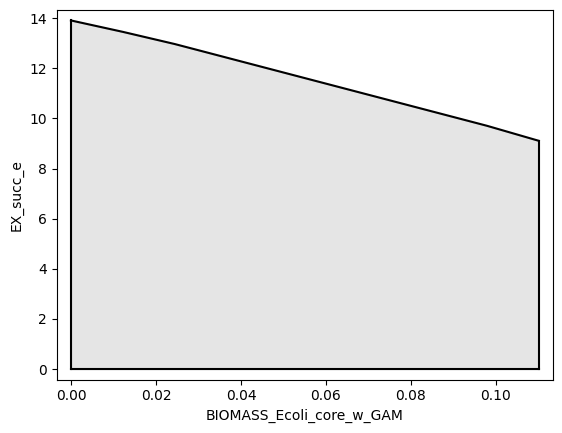

In [31]:
%matplotlib inline
from mewpy.visualization.envelope import plot_flux_envelope

plot_flux_envelope(simul,'BIOMASS_Ecoli_core_w_GAM','EX_succ_e',constraints = constraints)

The `simulate` method includes additional parameters, such as the optimization direction. For a full description please refer to the module documentation. 

## Flux Variability Analysis

The simulator interface also allows to perform Flux Variability Analysis (FVA) for all reactions, a list of reactions, or only for succinate:


In [32]:
# returns a dictionary
simul.FVA(format='df')

,Minimum,Maximum
Reaction ID,,
ACALD,-16.095510,-5.903510
ACALDt,-3.057600,0.000000
ACKr,-8.653227,-0.464848
ACONTa,0.205527,0.900436
ACONTb,0.205527,0.900436
...,...,...
TALA,-0.037867,0.943613
THD2,0.000000,7.088275
TKT1,-0.037867,0.943613


In [33]:
# or a data frame
simul.FVA('EX_succ_e',format='df')

,Minimum,Maximum
Reaction ID,,
EX_succ_e,0.0,1.911


By default, MEWpy sets the model objective fraction to 90%, however this fraction may be altered. For example, one might want to consider a fraction of 10% from optimal growth:

In [34]:
simul.FVA('EX_succ_e',obj_frac=0.9,format='df')

,Minimum,Maximum
Reaction ID,,
EX_succ_e,0.0,1.911


The FVA simulations are run considering the defined environmental conditions. Additional constraints may be added, or changed, such as the previouly used to increase L-tyrosine production.

In [35]:
simul.FVA('EX_succ_e', constraints=constraints,format='df')

,Minimum,Maximum
Reaction ID,,
EX_succ_e,0.0,9.651385


COBRApy users may have noticed that this same task would have required many additional coding lines if using the COBRApy API directly.

## Genes and reactions essentiality

Gene and reaction essentiality tests identify, respectively, the list of genes and reactions whose deletion would prevent the organism to grow. 

In [36]:
simul.essential_reactions()

100%|██████████| 95/95 [00:00<00:00, 752.80it/s]


['ACONTa',
 'ACONTb',
 'BIOMASS_Ecoli_core_w_GAM',
 'CS',
 'ENO',
 'EX_h_e',
 'EX_nh4_e',
 'EX_pi_e',
 'FBA',
 'GAPD',
 'GLCpts',
 'GLNS',
 'ICDHyr',
 'NH4t',
 'PFK',
 'PGI',
 'PGK',
 'PGM',
 'PIt2r',
 'PPC',
 'RPI',
 'TPI']

In [37]:
simul.essential_genes()

100%|██████████| 137/137 [00:00<00:00, 937.36it/s]


['b0720',
 'b2779',
 'b2415',
 'b2416',
 'b1779',
 'b1136',
 'b4025',
 'b2926',
 'b3956',
 'b3919']

For more options and methods please refer to the MEWpy documentation.